Exploring the Data

In [ ]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
%matplotlib inline
import matplotlib.pyplot as plt

# Load the student dataset
#data1 = pd.read_csv("student-mat.csv")
data = pd.read_csv("data.csv")

display(data.shape)
display(data.head())

In [75]:
Data Preprocessing

SyntaxError: invalid syntax (<ipython-input-75-4cc31089c901>, line 1)

display(data['schoolsup'].tail())

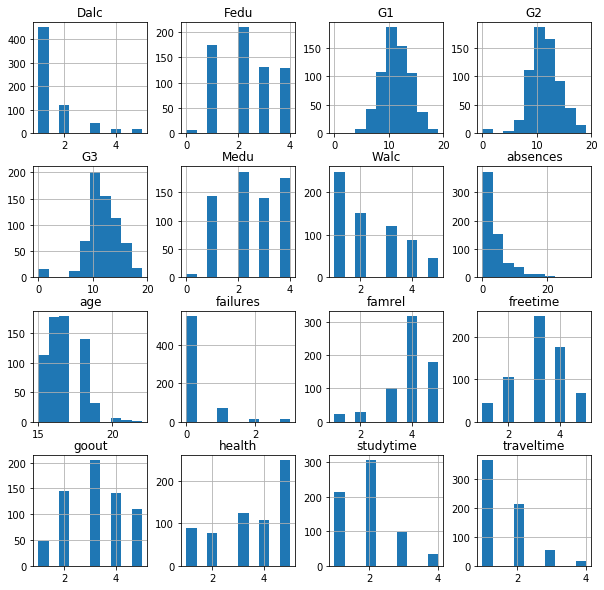

In [54]:
data.hist(figsize=(10,10))
plt.show()

In [55]:
display(data.describe())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [56]:
#removing target variable
target = data['G3'] 
data.drop('G3',axis=1,inplace=True)
display(target.head())

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

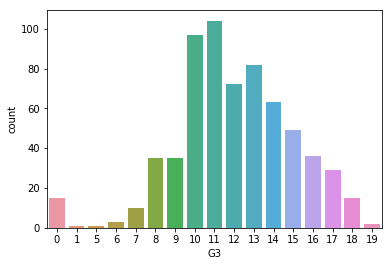

In [57]:
import seaborn as sn
sn.countplot(target)
#print target

Data Cleaning


In [58]:
#dropping missing elements
data=data.dropna()

#removing unnecessery attributes
improved_data = data.drop(['address','romantic','Pstatus','guardian'],axis=1,inplace=False)
display(improved_data.head())
display(improved_data.shape)
display(improved_data['paid'][0])

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,GT3,4,4,at_home,teacher,course,2,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,GT3,1,1,at_home,other,course,1,...,yes,5,3,3,1,1,3,2,9,11
2,GP,F,15,LE3,1,1,at_home,other,other,1,...,yes,4,3,2,2,3,3,6,12,13
3,GP,F,15,GT3,4,2,health,services,home,1,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,GT3,3,3,other,other,home,1,...,no,4,3,2,1,2,5,0,11,13


(649, 28)

'no'

Data Transformation

In [ ]:
# changing the data binary format(Yes/No) into 1/0
binary_data=['schoolsup','famsup','paid','activities','nursery','higher','internet']
for i in binary_data:
    improved_data[i] = improved_data[i].map({'yes':1,'no':0})
#for i in binary_data:
 #   display(improved_data[i][0])
improved_data['famsize'] = improved_data['famsize'].map({'LE3':0,'GT3':1})

In [60]:
display(improved_data.shape)

(649, 28)

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical=['age','Medu','Fedu','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher',
           'internet','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','famsize']

features_minmax_transform = improved_data
features_minmax_transform[numerical] = scaler.fit_transform(improved_data[numerical])

# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,0.428571,1.0,1.00,1.00,at_home,teacher,course,0.333333,...,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.000000,0.578947
1,GP,F,0.285714,1.0,0.25,0.25,at_home,other,course,0.000000,...,1.0,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,0.473684,0.578947
2,GP,F,0.000000,0.0,0.25,0.25,at_home,other,other,0.000000,...,1.0,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,0.631579,0.684211
3,GP,F,0.000000,1.0,1.00,0.50,health,services,home,0.000000,...,1.0,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,0.736842,0.736842
4,GP,F,0.142857,1.0,0.75,0.75,other,other,home,0.000000,...,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,0.578947,0.684211


In [62]:
# one-hot encodnig on categorical data

features_final = pd.get_dummies(features_minmax_transform)
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

41 total features after one-hot encoding.


In [63]:
display(features_final.head())

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,0.428571,1.0,1.00,1.00,0.333333,0.333333,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
1,0.285714,1.0,0.25,0.25,0.000000,0.333333,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,0
2,0.000000,0.0,0.25,0.25,0.000000,0.333333,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0.000000,1.0,1.00,0.50,0.000000,0.666667,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,1,0,0
4,0.142857,1.0,0.75,0.75,0.000000,0.333333,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0


Data spliting

In [ ]:
#spliting the data into testing data nd training data
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0 )

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Data Modelling

In [65]:
#using logistic regression to classify the data 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score


logistic = LogisticRegression(random_state=24)
logistic.fit(X_train,y_train)
predict = logistic.predict(X_test)
acc_score = accuracy_score(y_test,predict)
f_beta = fbeta_score(y_test, predict,  average='weighted',beta=0.5)

display("accuracy Score = {}".format(acc_score))
display("fbeta score = {}".format(f_beta))


'accuracy Score = 0.184615384615'

'fbeta score = 0.178820928941'

In [66]:
#using adaboost classifier 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score



AdaBoost = AdaBoostClassifier(random_state=24)
AdaBoost.fit(X_train,y_train)
predict = AdaBoost.predict(X_test)
acc_score = accuracy_score(y_test,predict)
f_beta = fbeta_score(y_test, predict,  average='weighted',beta=0.5)

display("accuracy Score = {}".format(acc_score))
display("fbeta score = {}".format(f_beta))

'accuracy Score = 0.292307692308'

'fbeta score = 0.104463766061'

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
 
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
acc_score = accuracy_score(y_test,predict)
f_beta=fbeta_score(y_test, predict,  average='weighted',beta=0.5)

print f1_score(y_test, predict,average='weighted')
print matthews_corrcoef(y_test, predict)

display("accuracy Score = {}".format(acc_score))
display("fbeta score = {}".format(f_beta))

0.3136286313661879
0.22962513654235922


'accuracy Score = 0.315384615385'

'fbeta score = 0.315089144894'

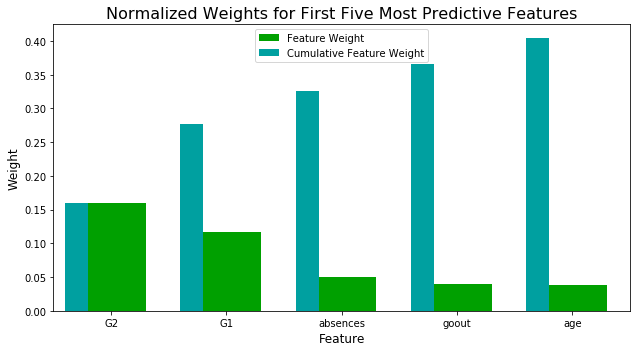

In [68]:
from sklearn.ensemble import RandomForestClassifier
import visuals as vs

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model =  RandomForestClassifier(random_state = 0).fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

#print(importances)
# Plot
vs.feature_plot(importances, X_train, y_train)

In [69]:
#spliting the data into testing data nd training data on important features.
from sklearn.cross_validation import train_test_split



imp_X_train, imp_X_test, imp_y_train, imp_y_test = train_test_split(features_final[['G2','G1','absences','goout','age',]],
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 24)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 519 samples.
Testing set has 130 samples.


In [70]:
#traing the data on random forest on importanat features without usimg all
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
 
clf = RandomForestClassifier()
clf.fit(imp_X_train, imp_y_train)
predict = clf.predict(imp_X_test)
acc_score = accuracy_score(imp_y_test,predict)
f_beta=fbeta_score(imp_y_test, predict,  average='weighted',beta=0.5)

display("accuracy Score = {}".format(acc_score))
display("fbeta score = {}".format(f_beta))

'accuracy Score = 0.376923076923'

'fbeta score = 0.364748496527'

In [71]:
# here we use the grid search for optimized tuning its parametrs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import ShuffleSplit


model = DecisionTreeClassifier()
model.fit(imp_X_train,imp_y_train)

param = {'max_depth':[1,2,3],'criterion':['entropy','gini']}

scorer = make_scorer(fbeta_score,beta=0.5,average = "weighted")
cv_sets = ShuffleSplit(imp_X_train.shape[0], n_iter = 10, test_size = 0.20 ,random_state=24)

grid_obj = GridSearchCV(estimator = model , param_grid = param, scoring = scorer,cv=cv_sets)

grid_fit = grid_obj.fit(imp_X_train,imp_y_train)
best_model = grid_fit.best_estimator_

#using the best estimator we are predicting the data  

opt_predict = best_model.predict(imp_X_test)
opt_fbeta_score = fbeta_score(opt_predict,imp_y_test,beta=0.5,average="weighted")
print(opt_fbeta_score)

display("fbeta score = {}".format(opt_fbeta_score))

0.6650834202097072


'fbeta score = 0.66508342021'

In [80]:
#for my convience for plotting the feature importance graph I used the visulas of preivous project.